<a href="https://colab.research.google.com/github/jeremyjcheng/SPIS-final-project-2023/blob/main/CasaCrawlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown  1uX3_nPqkIqsu474VgHAGh1jsX47PZmVb
! unzip "SPIS_Images.zip" -d .
! gdown 1-VGolXn9FI6Ro9_AChu77d5pYS4xX7gX

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
! pip install pillow


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Preprocessing
training_data = pd.read_csv("Toronto_Apartments.csv")
training_data.head(10)


Bedroom  Bathroom  Den                                          Address  \
0        2         2    0        11 Brunel Ct, Toronto, ON M5V 3Y3, Canada   
1        2         2    0         12 Yonge St, Toronto, ON M5E 1Z9, Canada   
2        1         1    0   438 Richmond St W, Toronto, ON M5V 1X9, Canada   
3        1         1    1          12 York St, Toronto, ON M5J 2Z2, Canada   
4        1         1    0  3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada   
5        2         2    0       168 Simcoe St, Toronto, ON M5H 4C9, Canada   
6        2         2    0            70 Temperance St, M5H4E8, Toronto, ON   
7        2         1    0             700 Ross st, L7S 1S2, Burlington, ON   
8        1         1    0       10 Capreol Ct, Toronto, ON M5V 4B3, Canada   
9        2         2    0         5 Hanna Ave, Toronto, ON M6K 0B3, Canada   

         Lat       Long      Price  
0  43.639406 -79.393232  $3,150.00  
1  43.643105 -79.375906  $3,200.00  
2  43.648005 -79.396834  $2,500.00  
3  43.641873 -79.381906  $2,400.00  
4  43.588602 -79.631700  $1,900.00  
5  43.650092 -79.387374  $3,600.00  
6  43.650560 -79.382072  $3,000.00  
7  43.328986 -79.808618  $1,600.00  
8  43.640223 -79.395951  $2,200.00  
9  43.637453 -79.418387  $2,500.00

Street Address/Monthly Rent/Number of Bedrooms/Number of bathrooms:
11 Brunel Ct, Toronto, ON M5V 3Y3, Canada $3,150.00 2 2


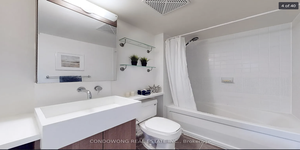

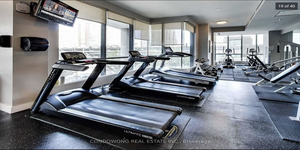

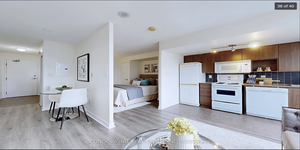

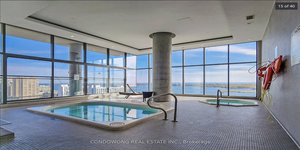

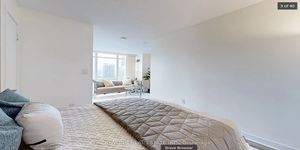

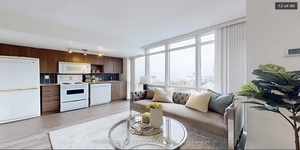

Do you like this house (y/n)? y
12 Yonge St, Toronto, ON M5E 1Z9, Canada $3,200.00 2 2


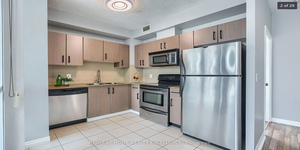

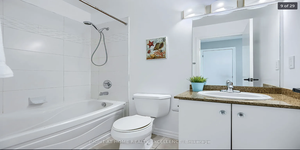

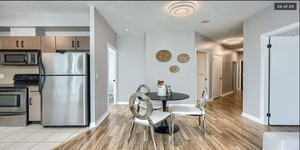

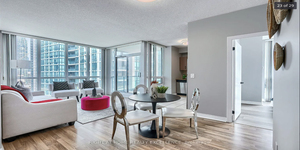

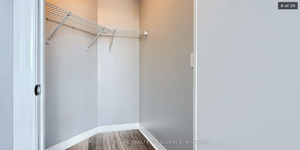

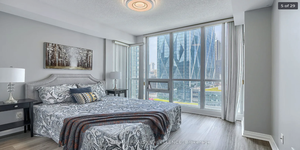

Do you like this house (y/n)? n
438 Richmond St W, Toronto, ON M5V 1X9, Canada $2,500.00 1 1


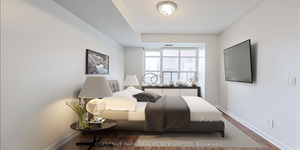

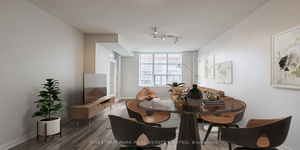

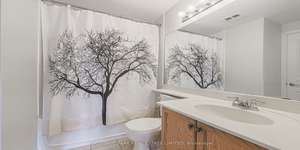

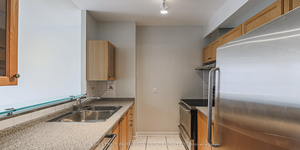

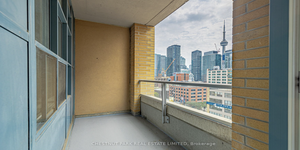

Do you like this house (y/n)? n
12 York St, Toronto, ON M5J 2Z2, Canada $2,400.00 1 1


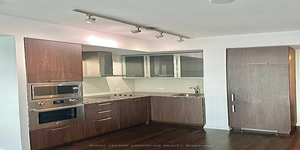

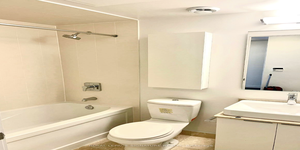

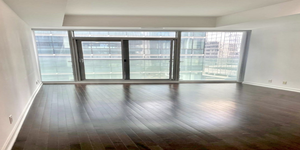

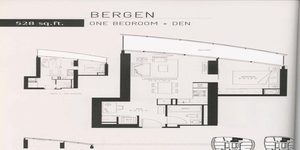

Do you like this house (y/n)? n
3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada $1,900.00 1 1


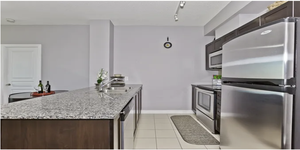

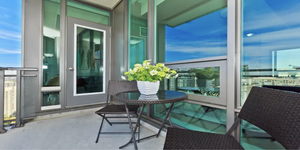

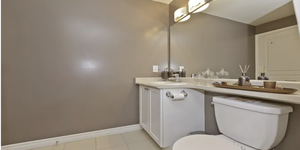

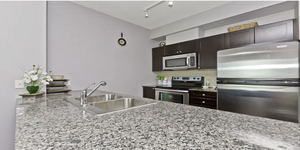

Do you like this house (y/n)? y
168 Simcoe St, Toronto, ON M5H 4C9, Canada $3,600.00 2 2


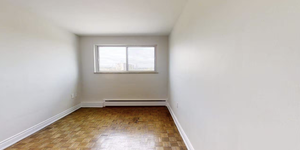

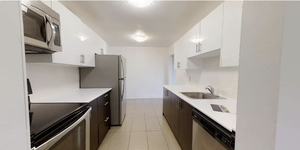

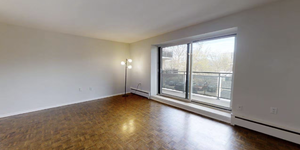

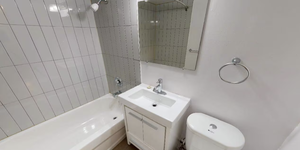

Do you like this house (y/n)? n
70 Temperance St, M5H4E8, Toronto, ON $3,000.00 2 2


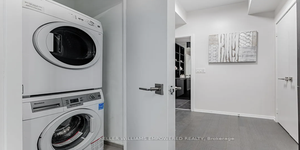

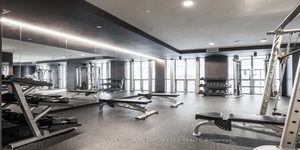

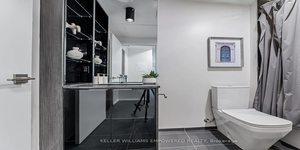

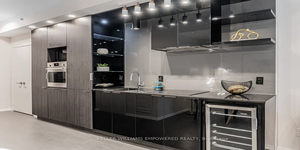

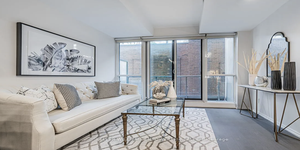

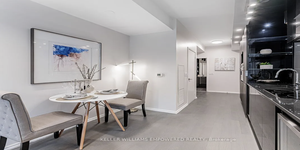

Do you like this house (y/n)? y
700 Ross st, L7S 1S2, Burlington, ON $1,600.00 2 1


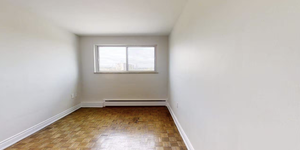

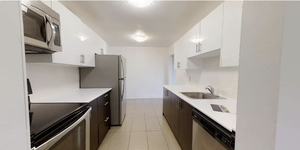

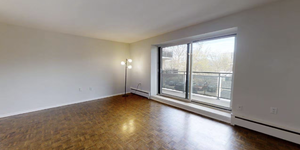

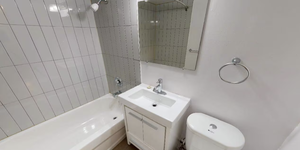

Do you like this house (y/n)? n
10 Capreol Ct, Toronto, ON M5V 4B3, Canada $2,200.00 1 1


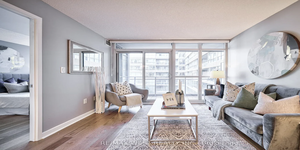

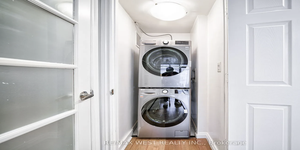

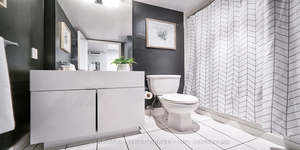

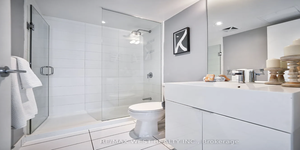

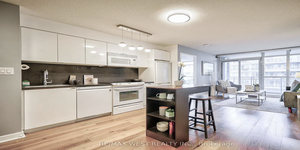

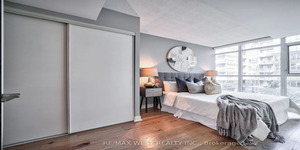

Do you like this house (y/n)? y
5 Hanna Ave, Toronto, ON M6K 0B3, Canada $2,500.00 2 2


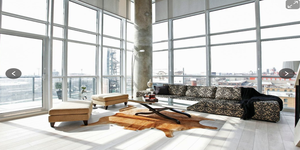

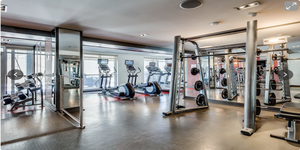

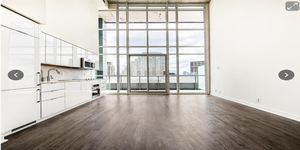

Do you like this house (y/n)? y
[1, 0, 0, 0, 1, 0, 1, 0, 1, 1]


In [5]:
from PIL import Image
import os

Capreol_Ct = Image.open("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada/Screenshot 2023-09-01 at 10.42.57 AM.png")
#display(Capreol_Ct)

Capreol_Image2 = Image.open("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada/Screenshot 2023-09-01 at 10.43.37 AM.png")
#display(Capreol_Image2)

# getting images of Capreol Ct to display
# for file in os.listdir("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada"):
#   filename = os.fsdecode(file)
#   if filename.endswith(".png"):
#     Capreol_Court = Image.open(os.path.join("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada", filename))
#     display(Capreol_Court)

# loop through rows of dataframe, take features and print, print text data, take image and run through display_address, input like or dislike, keep track of index if they like or not
def display_address(address):
  for file in os.listdir("/content/SPIS Training Images/" + address):
    filename = os.fsdecode(file)
    if filename.endswith(".png"):
      address_pictures = Image.open(os.path.join("/content/SPIS Training Images/" + address, filename))
      address_pictures = address_pictures.resize((300, 150), Image.Resampling.LANCZOS)
      display(address_pictures)

# display_address("11 Brunel Ct, Toronto, ON M5V 3Y3, Canada")
responses = []
print("Street Address/Monthly Rent/Number of Bedrooms/Number of bathrooms:")
for index in range(len(training_data)):
  print(training_data.loc[index,"Address"], training_data.loc[index,"Price"], training_data.loc[index, "Bedroom"], training_data.loc[index, "Bathroom"])
  display_address(training_data.loc[index,"Address"])
  single_response = input("Do you like this house (y/n)? ")
  if single_response == "y":
    responses.append(1)
  if single_response == "n":
    responses.append(0)

print(responses)

training_data['Preference'] = responses #added preference column to dataframe

In [6]:
training_data.head(10)

Bedroom  Bathroom  Den                                          Address  \
0        2         2    0        11 Brunel Ct, Toronto, ON M5V 3Y3, Canada   
1        2         2    0         12 Yonge St, Toronto, ON M5E 1Z9, Canada   
2        1         1    0   438 Richmond St W, Toronto, ON M5V 1X9, Canada   
3        1         1    1          12 York St, Toronto, ON M5J 2Z2, Canada   
4        1         1    0  3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada   
5        2         2    0       168 Simcoe St, Toronto, ON M5H 4C9, Canada   
6        2         2    0            70 Temperance St, M5H4E8, Toronto, ON   
7        2         1    0             700 Ross st, L7S 1S2, Burlington, ON   
8        1         1    0       10 Capreol Ct, Toronto, ON M5V 4B3, Canada   
9        2         2    0         5 Hanna Ave, Toronto, ON M6K 0B3, Canada   

         Lat       Long      Price  Preference  
0  43.639406 -79.393232  $3,150.00           1  
1  43.643105 -79.375906  $3,200.00           0  
2  43.648005 -79.396834  $2,500.00           0  
3  43.641873 -79.381906  $2,400.00           0  
4  43.588602 -79.631700  $1,900.00           1  
5  43.650092 -79.387374  $3,600.00           0  
6  43.650560 -79.382072  $3,000.00           1  
7  43.328986 -79.808618  $1,600.00           0  
8  43.640223 -79.395951  $2,200.00           1  
9  43.637453 -79.418387  $2,500.00           1

In [7]:
def convertPriceToNumber(price_as_string):
  price_as_string = price_as_string.replace('$', '')
  price_as_string = price_as_string.replace(',', '')
  price_as_number = float(price_as_string)
  adjusted_price_as_number = price_as_number * 1.22
  return adjusted_price_as_number

training_data['Price'] = training_data['Price'].apply(convertPriceToNumber)

In [8]:
training_data.head()

Bedroom  Bathroom  Den                                          Address  \
0        2         2    0        11 Brunel Ct, Toronto, ON M5V 3Y3, Canada   
1        2         2    0         12 Yonge St, Toronto, ON M5E 1Z9, Canada   
2        1         1    0   438 Richmond St W, Toronto, ON M5V 1X9, Canada   
3        1         1    1          12 York St, Toronto, ON M5J 2Z2, Canada   
4        1         1    0  3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada   

         Lat       Long   Price  Preference  
0  43.639406 -79.393232  3843.0           1  
1  43.643105 -79.375906  3904.0           0  
2  43.648005 -79.396834  3050.0           0  
3  43.641873 -79.381906  2928.0           0  
4  43.588602 -79.631700  2318.0           1

In [9]:
from decimal import Decimal
from re import sub

data = pd.read_csv("Toronto_Apartments_Full.csv")
data = data.drop_duplicates('Address')
cond = data['Address'].isin(training_data['Address'])
data.drop(data[cond].index, inplace = True)

def convertPriceToNumber(price_as_string):
  price_as_string = price_as_string.replace('$', '')
  price_as_string = price_as_string.replace(',', '')
  price_as_number = float(price_as_string)
  adjusted_price_as_number = price_as_number * 1.22
  return adjusted_price_as_number
data.head(10)
# print(type(data))
# row = 0
# data['vector'] = [0] * (len(data))
# for index,apt in data.iterrows():
#   data['vector'][index] = [int(apt['Bedroom']),int(apt['Bathroom']),Decimal(sub(r'[^\d.]', '', apt['Price']))/1000]


data['Price'] = data['Price'].apply(convertPriceToNumber)

data.head(10)

Bedroom  Bathroom  Den                                            Address  \
0        2       2.0    0  3985 Grand Park Drive, 3985 Grand Park Dr, Mis...   
1        1       1.0    1        361 Front St W, Toronto, ON M5V 3R5, Canada   
2        1       1.0    0             89 McGill Street, Toronto, ON, M5B 0B1   
3        2       2.0    0               10 York Street, Toronto, ON, M5J 0E1   
4        1       1.0    0      80 St Patrick St, Toronto, ON M5T 2X6, Canada   
5        1       1.0    0            87 Jameson Avenue, Toronto, ON, M6K 2W8   
6        2       1.0    0          700  Ross Street, Burlington, ON, L7S 1S2   
7        1       1.0    0             25 Telegram Mews, Toronto, ON, M5V 3Z2   
8        1       1.0    0               560 Front St W, toronto, ON, M5V 0L5   
9        1       1.0    1  70 Queens Wharf Rd 33rd Floor, Toronto, ON M5V...   

         Lat       Long    Price  
0  43.581639 -79.648193  2989.00  
1  43.643051 -79.391643  2623.00  
2  43.660605 -79.378635  2379.00  
3  43.641087 -79.381405  3538.00  
4  43.652487 -79.389622  2196.00  
5  43.634890 -79.434654  2109.38  
6  43.328986 -79.808618  2055.70  
7  43.640918 -79.393982  2318.00  
8  43.641308 -79.400093  2318.00  
9  43.640068 -79.399960  2928.00

In [10]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

X_train = training_data[['Bedroom', 'Bathroom', 'Price']].to_numpy()
y_train = training_data['Preference'].to_numpy()

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
model.predict_proba(data[['Bedroom', 'Bathroom', 'Price']].to_numpy())

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       ...,
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [12]:
predictions = model.predict(data[['Bedroom', 'Bathroom', 'Price']].to_numpy())
data['Prediction'] = predictions

In [13]:
data.head(10)

Bedroom  Bathroom  Den                                            Address  \
0        2       2.0    0  3985 Grand Park Drive, 3985 Grand Park Dr, Mis...   
1        1       1.0    1        361 Front St W, Toronto, ON M5V 3R5, Canada   
2        1       1.0    0             89 McGill Street, Toronto, ON, M5B 0B1   
3        2       2.0    0               10 York Street, Toronto, ON, M5J 0E1   
4        1       1.0    0      80 St Patrick St, Toronto, ON M5T 2X6, Canada   
5        1       1.0    0            87 Jameson Avenue, Toronto, ON, M6K 2W8   
6        2       1.0    0          700  Ross Street, Burlington, ON, L7S 1S2   
7        1       1.0    0             25 Telegram Mews, Toronto, ON, M5V 3Z2   
8        1       1.0    0               560 Front St W, toronto, ON, M5V 0L5   
9        1       1.0    1  70 Queens Wharf Rd 33rd Floor, Toronto, ON M5V...   

         Lat       Long    Price  Prediction  
0  43.581639 -79.648193  2989.00           0  
1  43.643051 -79.391643  2623.00           1  
2  43.660605 -79.378635  2379.00           1  
3  43.641087 -79.381405  3538.00           1  
4  43.652487 -79.389622  2196.00           1  
5  43.634890 -79.434654  2109.38           1  
6  43.328986 -79.808618  2055.70           1  
7  43.640918 -79.393982  2318.00           1  
8  43.641308 -79.400093  2318.00           1  
9  43.640068 -79.399960  2928.00           0

In [14]:
preferred = data['Prediction'] == 1
recommended_houses = data[preferred]
sampled_recommended_houses = recommended_houses.sample(20)
sampled_recommended_houses.head(20)

Bedroom  Bathroom  Den                                          Address  \
647         2       1.5    0                          , NA M3N 1J2 ON, Canada   
1049        2       1.0    0         Bathurst St, Toronto, ON M5S 2P9, Canada   
271         3       2.0    0                           , M5V 2G4, Toronto, ON   
770         1       1.0    0       88 Bloor Street East, Toronto, ON, M4W 3G9   
708         1       1.0    0         72 Carden St, Guelph, ON N1H 3A3, Canada   
899         2       2.0    0  215 Fort York Blvd, Toronto, ON M5V 4A2, Canada   
1           1       1.0    1      361 Front St W, Toronto, ON M5V 3R5, Canada   
581         1       1.0    0                     , toronto M5B 1Z8 ON, Canada   
1121        1       1.0    0      Upper Beaches, Toronto, ON, Canada, M4C 1B4   
767         1       1.0    1     215 Sherway Gardens Rd, Etobicoke M9C 0A4 ON   
633         1       1.0    0     120 Bayview Ave, Toronto, ON M5A 0G4, Canada   
833         2       2.0    0          770 Bay St, Toronto, ON M5G 0A6, Canada   
1027        1       1.0    0      University Ave, Toronto, ON M5G 1S9, Canada   
555         1       1.0    0   155 Yorkville Ave, Toronto, ON M5R 1C4, Canada   
916         3       1.0    0     36 Richmond St E, Oshawa, ON L1G 1E5, Canada   
76          2       1.0    0                            Port Hope, ON, Canada   
1019        1       1.0    0                      , Toronto M6k1z4 ON, Canada   
825         1       1.0    0     17 Dundonald St, Toronto, ON M4Y 1K3, Canada   
1114        1       1.0    0                  , Mississauga L5B3Z4 ON, Canada   
144         1       1.0    0        28 Church St W, Acton, ON L7J 1X4, Canada   

            Lat       Long    Price  Prediction  
647   43.748557 -79.506065  1586.00           1  
1049  43.658278 -79.408437   732.00           1  
271   43.646764 -79.392221  3904.00           1  
770   43.670811 -79.385239  2072.78           1  
708   43.544619 -80.247383  1189.50           1  
899   43.636346 -79.404535  3416.00           1  
1     43.643051 -79.391643  2623.00           1  
581   43.660457 -79.378497  2440.00           1  
1121  43.683386 -79.309409  2196.00           1  
767   43.609532 -79.557095  2562.00           1  
633   43.653978 -79.354134  2501.00           1  
833   43.660137 -79.385869  3599.00           1  
1027  43.653886 -79.388087  2562.00           1  
555   43.670320 -79.394433  2318.00           1  
916   43.899780 -78.863064  2013.00           1  
76    43.949178 -78.293447  1945.90           1  
1019  43.637177 -79.426960  1586.00           1  
825   43.665928 -79.383465  2562.00           1  
1114  43.587277 -79.639158  2379.00           1  
144   43.628169 -80.041462  1433.50           1

In [15]:
from PIL import Image
import urllib.request
import requests

def show_image_from_url(url):
  urllib.request.urlretrieve(url, "Apart_Pictures.png")
  img = Image.open("Apart_Pictures.png")
  display(img)

Address: Bathurst St, Toronto, ON M5S 2P9, Canada
Bedroom: 2
Bathroom: 1.0
Price: 732.0


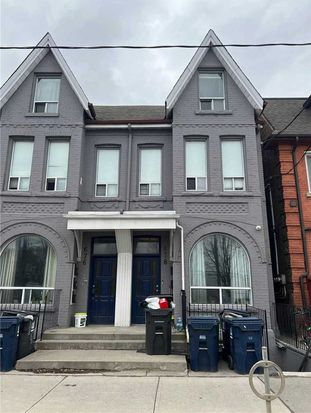

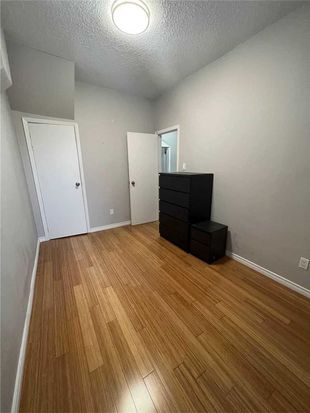

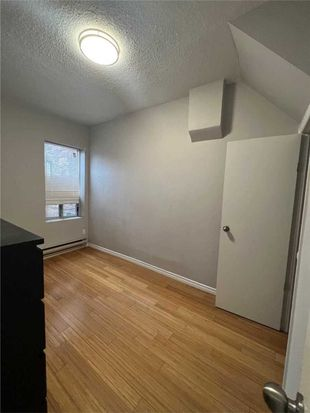

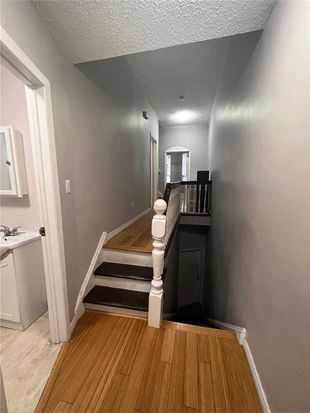

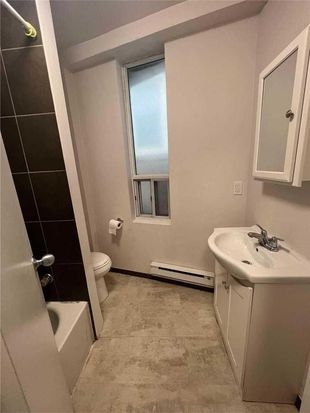

Address: 88 Bloor Street East, Toronto, ON, M4W 3G9
Bedroom: 1
Bathroom: 1.0
Price: 2072.7799999999997


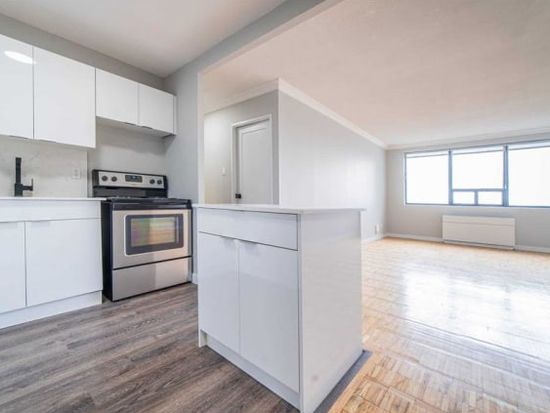

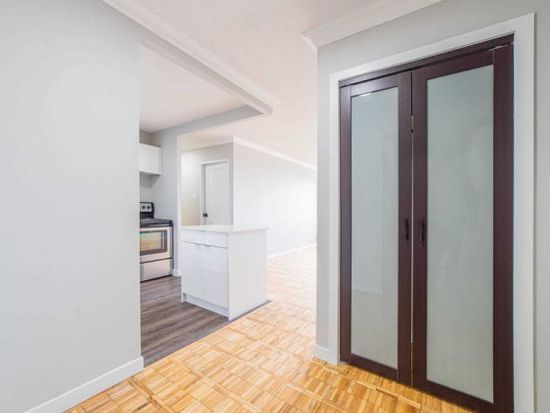

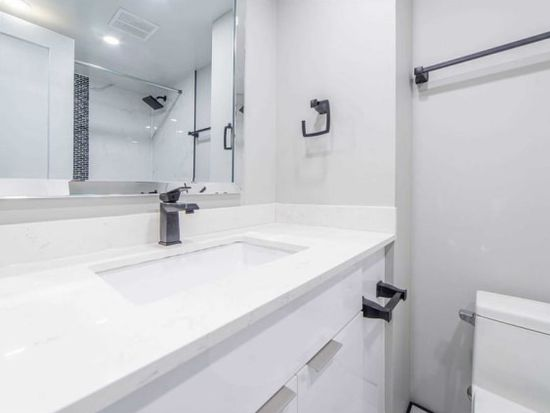

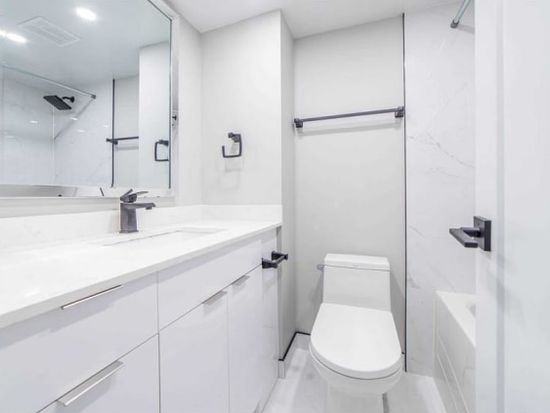

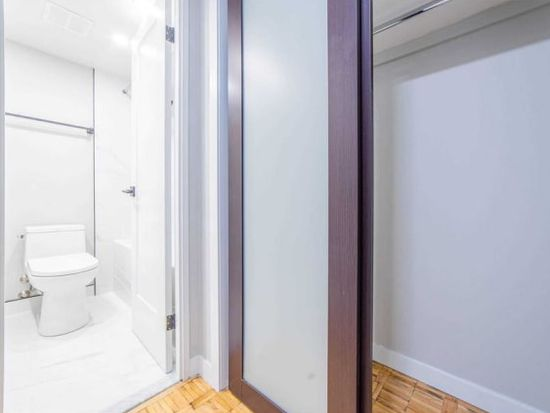

Address: 215 Fort York Blvd, Toronto, ON M5V 4A2, Canada
Bedroom: 2
Bathroom: 2.0
Price: 3416.0


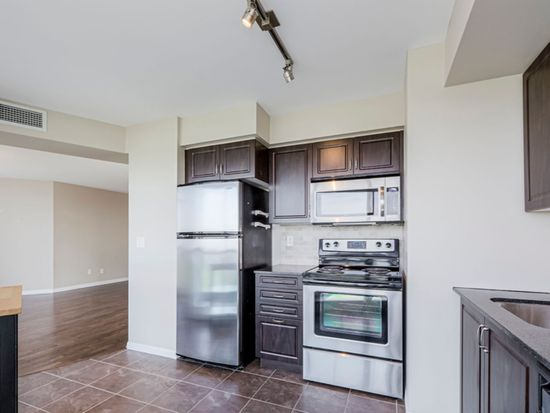

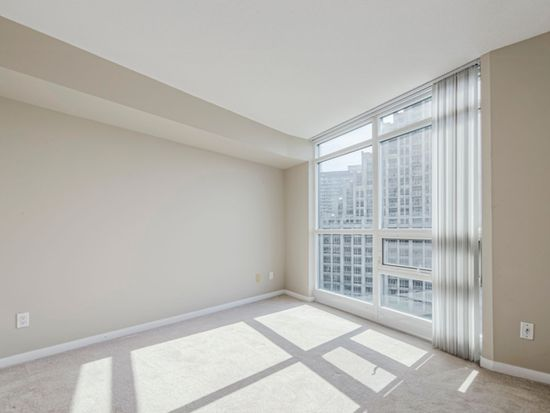

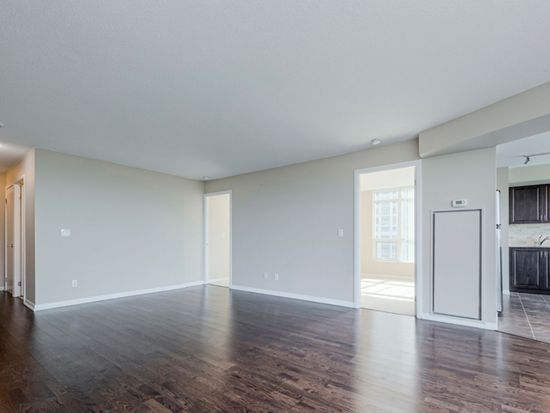

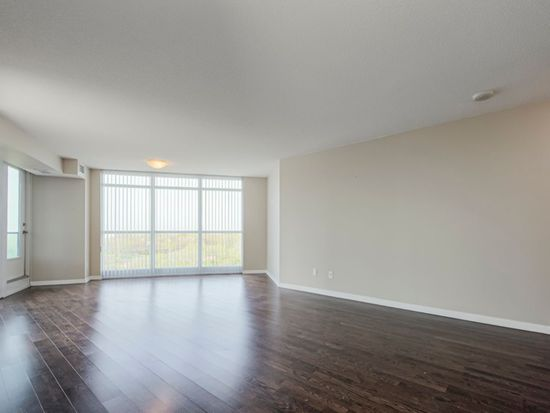

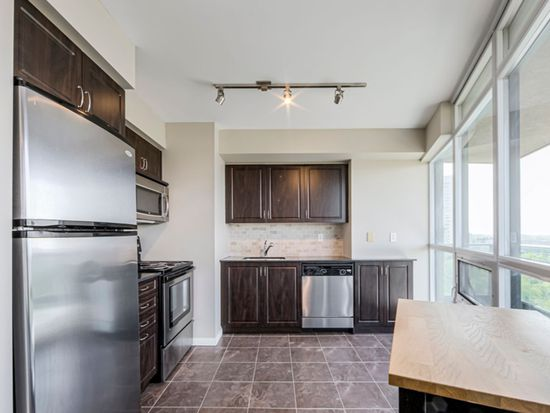

In [16]:
# trying to get images to display through a link
import requests
import time
# # url = "https://zillow56.p.rapidapi.com/photos"

# querystring = {"zpid":"2110846380"}

#get by address
url = "https://zillow56.p.rapidapi.com/search_address"
headers = {
	"X-RapidAPI-Key": "57684a204emsh286ec1bd405d5d9p191a8bjsn8aaebcd35eed",
	"X-RapidAPI-Host": "zillow56.p.rapidapi.com"
}
num_houses = 0
i = 0
while num_houses < 3:
	query = {"address": sampled_recommended_houses.iloc[i]['Address']}
	response = requests.get(url, headers=headers, params=query).json()
	time.sleep(1)
	if 'error' in response:
		i += 1
		continue
	print("Address: " + sampled_recommended_houses.iloc[i]['Address'])
	print("Bedroom: " + str(sampled_recommended_houses.iloc[i]['Bedroom']))
	print("Bathroom: " + str(sampled_recommended_houses.iloc[i]['Bathroom']))
	print("Price: " + str(sampled_recommended_houses.iloc[i]['Price']))
	for j in range(len(response['big'])):
			if j == 5:
				break
			show_image_from_url(response['big'][j]['url'])
	num_houses += 1
	i += 1

# query ={"address":'1161 Natchez Dr College Station Texas 77845'}

# response = requests.get(url, headers=headers, params=query)

# print(response.json())

# print(response.json()['photos'][0]['mixedSources']['jpeg'][0]["url"])


In [ ]:
#show_image_from_url(response['big'][2]['url'])

In [ ]:
#KNN model:
# Data --> Vectorize each Apartment(All Apartments) to be [# bedrooms, # bathrooms, #]